# Neuronal signal analysis for epilepsy detection

## Introduction of epilepsy


> *Epilepsy is a serious brain illness that is an endemic neurological disorder all over the world. It is a clinical result that occurs with abnormal neurological electrical discharging of brain.Epileptic seizures represent the most common positive signs and symptoms of brain disturbance, and epilepsy is one of the most common primary brain disorders. Vascular causes, traumatic causes, infections and brain abscesses, brain tumors, nutritional deficiencies, pyridoxine deficiency, calcium metabolism disorders are lead causes for epilepsy. For in diagnosing epilepsy, research is needed for better understanding of mechanisms causing epileptic disorders. The most widely accepted and used tool by epileptologists to identify seizures and diagnose epilepsy is the ElectroEncephaloGram (EEG).*

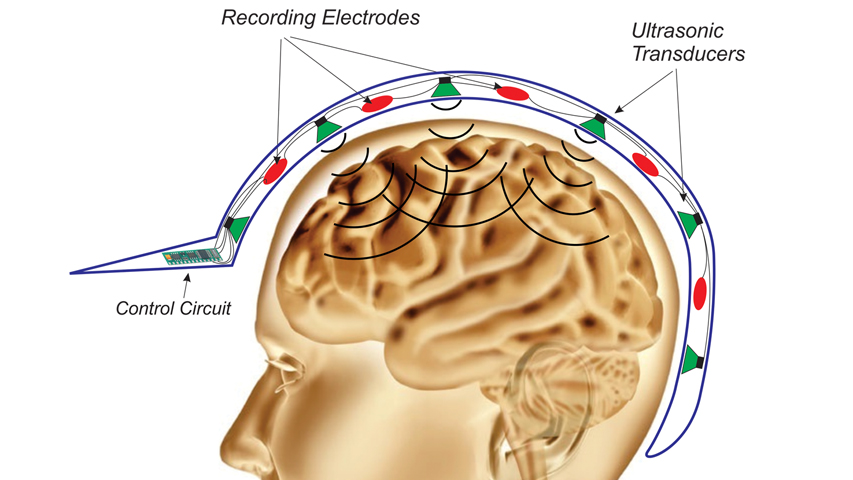

> *Time series analysis comprises methods for analyzing time series data in order to extract meaningful statistics and other characteristics of the data. Time series forecasting is the use of a model to predict future values based on previously observed values.The dataset contains 178 data points for 1 second, and each data point is the value of the EEG recording at a different point in time.*

In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn

In [64]:
data=pd.read_csv(r"/home/prerana/Desktop/data.csv")

In [65]:
data.head(3)

,Unnamed: 0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X170,X171,X172,X173,X174,X175,X176,X177,X178,y
0,X21.V1.791,135,190,229,223,192,125,55,-9,-33,...,-17,-15,-31,-77,-103,-127,-116,-83,-51,4
1,X15.V1.924,386,382,356,331,320,315,307,272,244,...,164,150,146,152,157,156,154,143,129,1
2,X8.V1.1,-32,-39,-47,-37,-32,-36,-57,-73,-85,...,57,64,48,19,-12,-30,-35,-35,-36,5


In [66]:
data.tail(3)

,Unnamed: 0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X170,X171,X172,X173,X174,X175,X176,X177,X178,y
11497,X8.V1.28,14,6,-13,-16,10,26,27,-9,4,...,-65,-48,-61,-62,-67,-30,-2,-1,-8,5
11498,X10.V1.932,-40,-25,-9,-12,-2,12,7,19,22,...,121,135,148,143,116,86,68,59,55,3
11499,X16.V1.210,29,41,57,72,74,62,54,43,31,...,-59,-25,-4,2,5,4,-2,2,20,4


In [67]:
data.describe()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X170,X171,X172,X173,X174,X175,X176,X177,X178,y
count,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.00000,11500.00000,11500.000000,...,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000
mean,-11.581391,-10.911565,-10.187130,-9.143043,-8.009739,-7.003478,-6.502087,-6.68713,-6.55800,-6.168435,...,-10.145739,-11.630348,-12.943478,-13.668870,-13.363304,-13.045043,-12.705130,-12.426000,-12.195652,3.000000
std,165.626284,166.059609,163.524317,161.269041,160.998007,161.328725,161.467837,162.11912,162.03336,160.436352,...,164.652883,166.149790,168.554058,168.556486,167.257290,164.241019,162.895832,162.886311,164.852015,1.414275
min,-1839.000000,-1838.000000,-1835.000000,-1845.000000,-1791.000000,-1757.000000,-1832.000000,-1778.00000,-1840.00000,-1867.000000,...,-1867.000000,-1865.000000,-1642.000000,-1723.000000,-1866.000000,-1863.000000,-1781.000000,-1727.000000,-1829.000000,1.000000
25%,-54.000000,-55.000000,-54.000000,-54.000000,-54.000000,-54.000000,-54.000000,-55.00000,-55.00000,-54.000000,...,-55.000000,-56.000000,-56.000000,-56.000000,-55.000000,-56.000000,-55.000000,-55.000000,-55.000000,2.000000
50%,-8.000000,-8.000000,-7.000000,-8.000000,-8.000000,-8.000000,-8.000000,-8.00000,-7.00000,-7.000000,...,-9.000000,-10.000000,-10.000000,-10.000000,-10.000000,-9.000000,-9.000000,-9.000000,-9.000000,3.000000
75%,34.000000,35.000000,36.000000,36.000000,35.000000,36.000000,35.000000,36.00000,36.00000,35.250000,...,34.000000,34.000000,33.000000,33.000000,34.000000,34.000000,34.000000,34.000000,34.000000,4.000000
max,1726.000000,1713.000000,1697.000000,1612.000000,1518.000000,1816.000000,2047.000000,2047.00000,2047.00000,2047.000000,...,1777.000000,1472.000000,1319.000000,1436.000000,1733.000000,1958.000000,2047.000000,2047.000000,1915.000000,5.000000


In [68]:
a=data.iloc[:,-1]
a.head(3)

0    4
1    1
2    5
Name: y, dtype: int64

> *Sorting values according to the required feature helps in getting total count and accessing becomes easier. Sorting according to certain feature sometimes creates mismatch of indexes thereby confusion. So, one can reset the indexes as shown below.*

In [69]:
b=data.sort_values(by="y")
b.head(3)

,Unnamed: 0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X170,X171,X172,X173,X174,X175,X176,X177,X178,y
10145,X7.V1.117,-362,-327,-229,-56,148,318,416,514,630,...,-497,-518,-529,-543,-526,-487,-395,-224,85,1
6388,X20.V1.924,-1839,-1838,-1835,-1687,-1186,-836,-698,-656,-727,...,-82,15,91,134,172,208,247,287,314,1
6384,X18.V1.316,-62,-4,30,40,36,34,43,52,56,...,243,242,223,175,100,14,-97,-172,-212,1


In [70]:
sorted_data=b.set_index('Unnamed: 0')
sorted_data.head(3)

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X170,X171,X172,X173,X174,X175,X176,X177,X178,y
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
X7.V1.117,-362,-327,-229,-56,148,318,416,514,630,760,...,-497,-518,-529,-543,-526,-487,-395,-224,85,1
X20.V1.924,-1839,-1838,-1835,-1687,-1186,-836,-698,-656,-727,-988,...,-82,15,91,134,172,208,247,287,314,1
X18.V1.316,-62,-4,30,40,36,34,43,52,56,60,...,243,242,223,175,100,14,-97,-172,-212,1


In [71]:
sorted_data.index.name= None
sorted_data.head(3)

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X170,X171,X172,X173,X174,X175,X176,X177,X178,y
X7.V1.117,-362,-327,-229,-56,148,318,416,514,630,760,...,-497,-518,-529,-543,-526,-487,-395,-224,85,1
X20.V1.924,-1839,-1838,-1835,-1687,-1186,-836,-698,-656,-727,-988,...,-82,15,91,134,172,208,247,287,314,1
X18.V1.316,-62,-4,30,40,36,34,43,52,56,60,...,243,242,223,175,100,14,-97,-172,-212,1


In [72]:
sorted_data.index.name="Unnamed: 0"
sorted_data.reset_index(inplace=True)
sorted_data.head(3)

,Unnamed: 0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X170,X171,X172,X173,X174,X175,X176,X177,X178,y
0,X7.V1.117,-362,-327,-229,-56,148,318,416,514,630,...,-497,-518,-529,-543,-526,-487,-395,-224,85,1
1,X20.V1.924,-1839,-1838,-1835,-1687,-1186,-836,-698,-656,-727,...,-82,15,91,134,172,208,247,287,314,1
2,X18.V1.316,-62,-4,30,40,36,34,43,52,56,...,243,242,223,175,100,14,-97,-172,-212,1


In [73]:
sorted_data1=sorted_data
sorted_data1.head(3)

,Unnamed: 0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X170,X171,X172,X173,X174,X175,X176,X177,X178,y
0,X7.V1.117,-362,-327,-229,-56,148,318,416,514,630,...,-497,-518,-529,-543,-526,-487,-395,-224,85,1
1,X20.V1.924,-1839,-1838,-1835,-1687,-1186,-836,-698,-656,-727,...,-82,15,91,134,172,208,247,287,314,1
2,X18.V1.316,-62,-4,30,40,36,34,43,52,56,...,243,242,223,175,100,14,-97,-172,-212,1


> *Data.info() is used to know total no. of entries present, which gives information of rows and columns. The response variable(dependent variable) is y in column 179. The Explanatory variables(independent variables) X1, X2, ..., X178. y contains the category of the 178-dimensional input vector.*

In [74]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11500 entries, 0 to 11499
Columns: 180 entries, Unnamed: 0 to y
dtypes: int64(179), object(1)
memory usage: 15.8+ MB


In [75]:
data.iloc[1].head(3)

Unnamed: 0    X15.V1.924
X1                   386
X2                   382
Name: 1, dtype: object

In [76]:
feature=data.drop("Unnamed: 0",axis=1)
feature.head(3)

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X170,X171,X172,X173,X174,X175,X176,X177,X178,y
0,135,190,229,223,192,125,55,-9,-33,-38,...,-17,-15,-31,-77,-103,-127,-116,-83,-51,4
1,386,382,356,331,320,315,307,272,244,232,...,164,150,146,152,157,156,154,143,129,1
2,-32,-39,-47,-37,-32,-36,-57,-73,-85,-94,...,57,64,48,19,-12,-30,-35,-35,-36,5


In [77]:
features=feature.drop("y",axis=1)
data1=features.head(3)
data1

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X169,X170,X171,X172,X173,X174,X175,X176,X177,X178
0,135,190,229,223,192,125,55,-9,-33,-38,...,8,-17,-15,-31,-77,-103,-127,-116,-83,-51
1,386,382,356,331,320,315,307,272,244,232,...,168,164,150,146,152,157,156,154,143,129
2,-32,-39,-47,-37,-32,-36,-57,-73,-85,-94,...,29,57,64,48,19,-12,-30,-35,-35,-36


> *Entries belonging to different labels are plotted to undestand how the data varies and the readings differ. There are five labels, each of which defines the condition in which the EEG recording took place. Label 1 - Recording of seizure activity.*

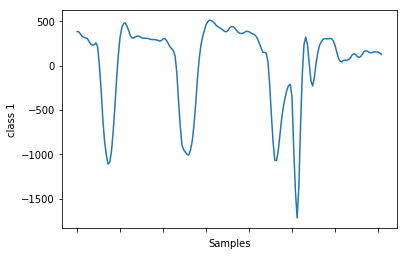

In [78]:
label1=features.iloc[1]
label1.plot(kind='line')
plt.xlabel('Samples')
plt.ylabel('class 1')
plt.show()

> *Label 2 - Readings are recorded from the area where tumor was located.*

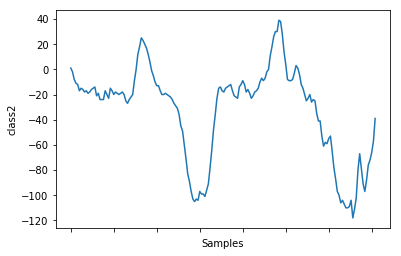

In [79]:
label2=features.iloc[7]
label2.plot(kind='line')
plt.xlabel('Samples')
plt.ylabel('class2')
plt.show()

> *Label 3 - Finding the areas where tumor is located and recording the EEG activity from the healthy part of the brain.*

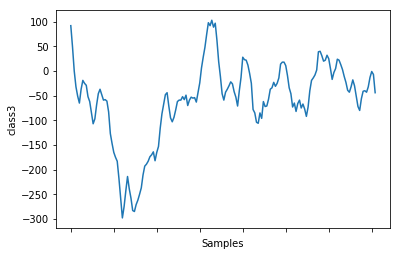

In [80]:
label3=features.iloc[12]
label3.plot(kind='line')
plt.xlabel('Samples')
plt.ylabel('class3')
plt.show()

> *Label 4 - Eyes closed, which means that the EEG recording was done when the patient had their eyes closed.*

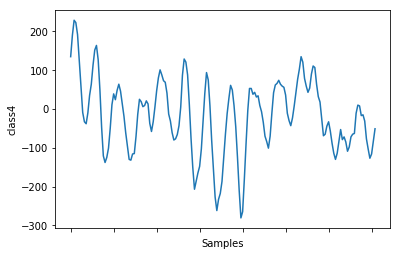

In [81]:
label4=features.iloc[0]
label4.plot(kind='line')
plt.xlabel('Samples')
plt.ylabel('class4')
plt.show()

> *Label 5 - Eyes open, which means that the EEG recording was done when the patient had their eyes open.*

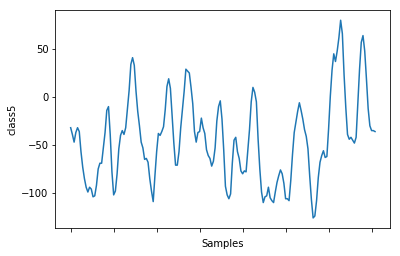

In [82]:
label5=features.iloc[2]
label5.plot(kind='line')
plt.xlabel('Samples')
plt.ylabel('class5')
plt.show()

In [83]:
d=np.array(features.iloc[0:11499])
d

array([[ 135,  190,  229, ..., -116,  -83,  -51],
       [ 386,  382,  356, ...,  154,  143,  129],
       [ -32,  -39,  -47, ...,  -35,  -35,  -36],
       ...,
       [ -47,  -11,   28, ...,   77,  117,  170],
       [  14,    6,  -13, ...,   -2,   -1,   -8],
       [ -40,  -25,   -9, ...,   68,   59,   55]])

> *Finding out the total count of patients belonging to individual labels.*

In [84]:
count1=0
count2=0
count3=0
count4=0
count5=0
feature.iloc[:,-1]
a=feature.iloc[:,-1]
for k in range(11500):
    if a[k]==1:
        count1=count1+1
    elif a[k]==2:
        count2=count2+1
    elif a[k]==3:
        count3=count3+1
    elif a[k]==4:
        count4=count4+1
    elif a[k]==5:
        count5=count5+1

print(count1)
print(count2)
print(count3)
print(count4)
print(count5)

2300
2300
2300
2300
2300


In [85]:
X = data.iloc[:,1:179].values
X.shape

(11500, 178)

> *Subplot here helps in comparing patients belonging to different labels and identify their classification.*

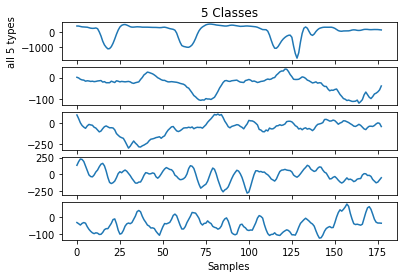

In [86]:
plt.subplot(511)
plt.plot(X[1,:])
plt.title('5 Classes')
plt.ylabel('all 5 types')
plt.subplot(512)
plt.plot(X[7,:])
plt.subplot(513)
plt.plot(X[12,:])
plt.subplot(514)
plt.plot(X[0,:])
plt.subplot(515)
plt.plot(X[2,:])
plt.xlabel('Samples')
plt.show()

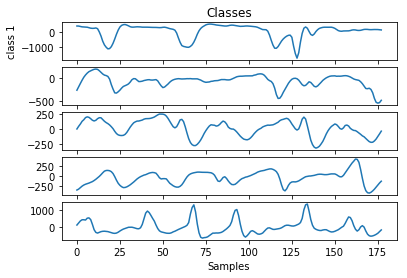

In [87]:
plt.subplot(511)
plt.plot(d[1,:])
plt.title('Classes')
plt.ylabel('class 1')
plt.subplot(512)
plt.plot(d[22,:])
plt.subplot(513)
plt.plot(d[23,:])
plt.subplot(514)
plt.plot(d[81,:])
plt.subplot(515)
plt.plot(d[82,:])
plt.xlabel('Samples')
plt.show()

> *This is a subplot of some of the 5 patients belonging to label 1.*

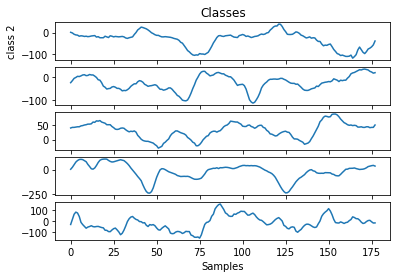

In [88]:
plt.subplot(511)
plt.plot(d[7,:])
plt.title('Classes')
plt.ylabel('class 2')
plt.subplot(512)
plt.plot(d[14,:])
plt.subplot(513)
plt.plot(d[16,:])
plt.subplot(514)
plt.plot(d[19,:])
plt.subplot(515)
plt.plot(d[28,:])
plt.xlabel('Samples')
plt.show()

> *This is a subplot of some of the 5 patients belonging to label 2*

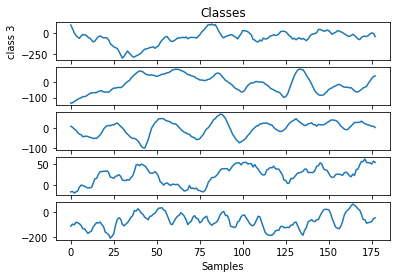

In [89]:
plt.subplot(511)
plt.plot(d[12,:])
plt.title('Classes')
plt.ylabel('class 3')
plt.subplot(512)
plt.plot(d[15,:])
plt.subplot(513)
plt.plot(d[17,:])
plt.subplot(514)
plt.plot(d[25,:])
plt.subplot(515)
plt.plot(d[71,:])
plt.xlabel('Samples')
plt.show()

> *This is a subplot of some of the 5 patients belonging to label 3.*

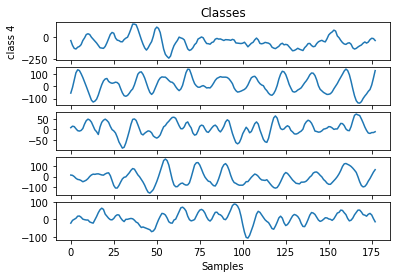

In [90]:
plt.subplot(511)
plt.plot(d[80,:])
plt.title('Classes')
plt.ylabel('class 4')
plt.subplot(512)
plt.plot(d[6,:])
plt.subplot(513)
plt.plot(d[9,:])
plt.subplot(514)
plt.plot(d[13,:])
plt.subplot(515)
plt.plot(d[18,:])
plt.xlabel('Samples')
plt.show()

> *This is a subplot of some of the 5 patients belonging to label 4.*

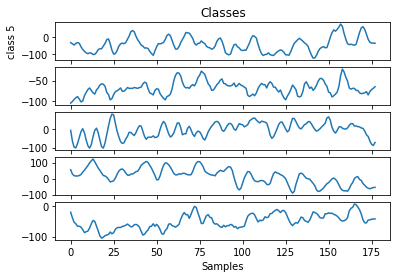

In [91]:
plt.subplot(511)
plt.plot(d[2,:])
plt.title('Classes')
plt.ylabel('class 5')
plt.subplot(512)
plt.plot(d[3,:])
plt.subplot(513)
plt.plot(d[4,:])
plt.subplot(514)
plt.plot(d[5,:])
plt.subplot(515)
plt.plot(d[26,:])
plt.xlabel('Samples')
plt.show()

> *This is a subplot of some of the 5 patients belonging to label 5.*

> *Small activity on comparing the below patients recording with the above plotted graphs and trying to predict the labels they belong to.*

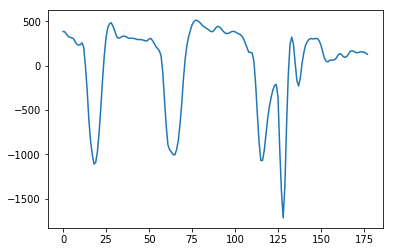

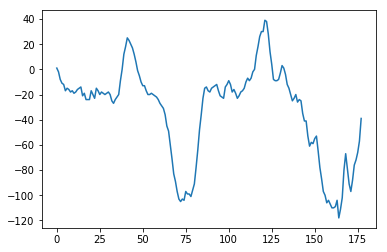

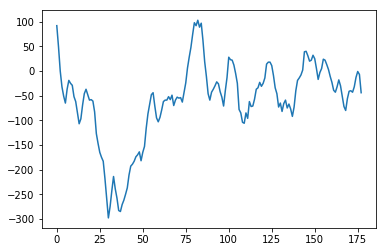

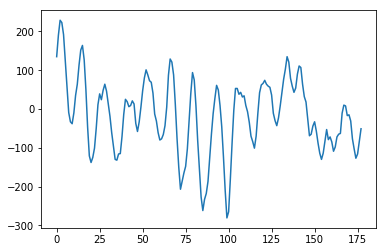

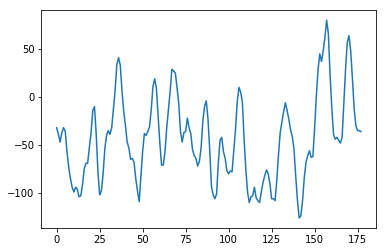

In [92]:
plt.plot(d[1,:])
plt.show()
plt.plot(d[7,:])
plt.show()
plt.plot(d[12,:])
plt.show()
plt.plot(d[0,:])
plt.show()
plt.plot(d[2,:])
plt.show()

In [93]:
x=b.groupby(["y"]).mean()
x

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X169,X170,X171,X172,X173,X174,X175,X176,X177,X178
y,,,,,,,,,,,,,,,,,,,,,
1,-21.936522,-19.049130,-15.293913,-9.836087,-3.707391,2.730000,6.899565,7.425652,8.380870,10.773913,...,-7.266522,-9.714783,-15.909565,-22.383043,-26.424783,-26.221739,-25.830870,-25.043913,-24.548261,-24.016522
2,-7.710000,-8.148696,-8.020000,-8.050435,-7.776957,-8.220870,-8.597826,-9.210000,-9.217826,-9.347826,...,-7.979565,-8.483043,-8.967391,-9.067391,-8.924783,-8.592174,-8.524348,-8.558696,-8.187391,-8.147391
3,-9.207391,-9.276522,-9.968261,-10.634348,-11.172174,-11.559130,-11.797826,-12.013043,-12.132609,-12.249130,...,-13.590000,-13.332174,-13.218696,-12.789565,-12.366087,-11.320000,-10.455217,-9.757391,-9.418696,-8.935217
4,-12.726087,-12.410435,-12.272609,-12.096957,-12.083043,-12.349130,-13.064348,-13.419565,-13.441739,-13.147826,...,-13.428696,-13.636522,-14.114783,-14.404783,-14.251304,-14.109565,-13.653913,-13.082174,-12.791739,-12.914783
5,-6.326957,-5.673043,-5.380870,-5.097391,-5.309130,-5.618261,-5.950000,-6.218696,-6.378696,-6.871304,...,-5.229565,-5.562174,-5.941304,-6.072609,-6.377391,-6.573043,-6.760870,-7.083478,-7.183913,-6.964348


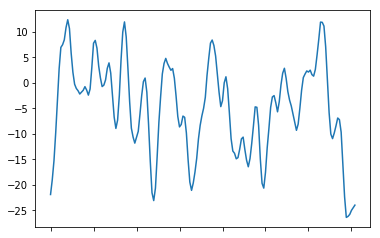

In [94]:
class1=x.iloc[0]
class1.plot(kind='line')
plt.show()

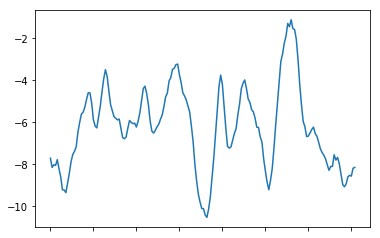

In [95]:
class2=x.iloc[1]
class2.plot(kind='line')
plt.show()

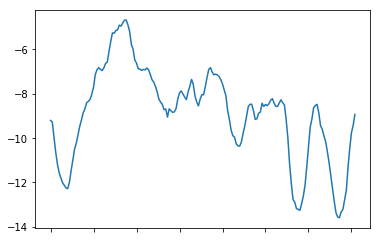

In [96]:
class3=x.iloc[2]
class3.plot(kind='line')
plt.show()

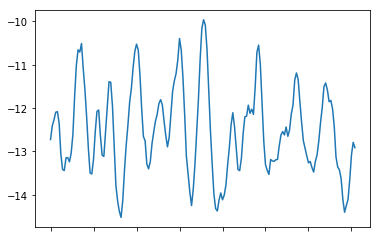

In [97]:
class4=x.iloc[3]
class4.plot(kind='line')
plt.show()

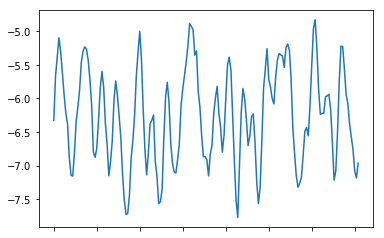

In [98]:
class5=x.iloc[4]
class5.plot(kind='line')
plt.show()

In [99]:
print(class1.min())
print(class1.max())

-26.42478260869565
12.320869565217391


In [100]:
print(class2.min())
print(class2.max())

-10.52304347826087
-1.1308695652173912


In [101]:
print(class3.min())
print(class3.max())

-13.59
-4.681739130434782


In [102]:
print(class4.min())
print(class4.max())

-14.524347826086956
-9.961304347826086


In [103]:
print(class5.min())
print(class5.max())

-7.770869565217391
-4.83


> *All patients falling in classes 2, 3, 4, and 5 are the ones who did not have epileptic seizure. Only patients in class 1 have epileptic seizure. Although there are 5 classes we have done binary classification, namely class 1 (Epileptic seizure) against the rest.*

/home/prerana/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


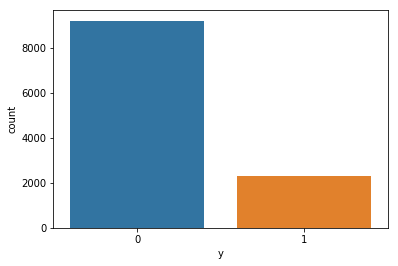

9200
2300


In [104]:
cols = data.columns
output = data.y
output[output>1]=0
ax = sn.countplot(output,label="Count")
plt.show()
non_seizure, seizure = output.value_counts()
print(non_seizure)
print(seizure)

## Logistic regression

In [105]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from matplotlib.colors import ListedColormap

import seaborn as sns

In [106]:
features.head(3)

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X169,X170,X171,X172,X173,X174,X175,X176,X177,X178
0,135,190,229,223,192,125,55,-9,-33,-38,...,8,-17,-15,-31,-77,-103,-127,-116,-83,-51
1,386,382,356,331,320,315,307,272,244,232,...,168,164,150,146,152,157,156,154,143,129
2,-32,-39,-47,-37,-32,-36,-57,-73,-85,-94,...,29,57,64,48,19,-12,-30,-35,-35,-36


In [107]:
x = np.array(features)
x

array([[ 135,  190,  229, ..., -116,  -83,  -51],
       [ 386,  382,  356, ...,  154,  143,  129],
       [ -32,  -39,  -47, ...,  -35,  -35,  -36],
       ...,
       [  14,    6,  -13, ...,   -2,   -1,   -8],
       [ -40,  -25,   -9, ...,   68,   59,   55],
       [  29,   41,   57, ...,   -2,    2,   20]])

In [108]:
y= data.iloc[:,179].values
y

array([0, 1, 0, ..., 0, 0, 0])

In [109]:
y[y>1]=0
y

array([0, 1, 0, ..., 0, 0, 0])

In [110]:
y = y.reshape(-1, 1)

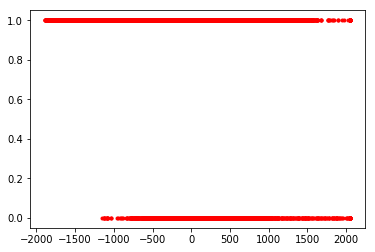

In [111]:
plt.plot(x, y, 'r.')
plt.show()

In [112]:
scaler = MinMaxScaler()
x = scaler.fit_transform(x)
y = scaler.fit_transform(y)

/home/prerana/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)
/home/prerana/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


In [113]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)


In [114]:
classifier = LogisticRegression(random_state = 0)
classifier.fit(x_train, y_train)

/home/prerana/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/prerana/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=0, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [115]:
y_pred = classifier.predict(x_test)

In [116]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[1876,    0],
       [ 407,   17]])

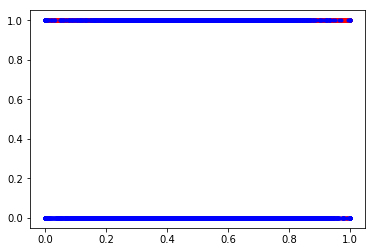

In [117]:
plt.plot(x_train, y_train, 'r.', x_test, y_pred, 'b.')
plt.show()

In [118]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
clf.fit(x_train, y_train)
y_pred_log_reg = clf.predict(x_test)
acc_log_reg = round(clf.score(x_train, y_train) * 100, 2)
print (str(acc_log_reg) + ' %')

/home/prerana/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/prerana/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


80.84 %


## SVM

In [119]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from matplotlib.colors import ListedColormap
from sklearn.metrics import confusion_matrix

In [120]:
m = np.array(features)
n = data.iloc[:,179].values

In [121]:
m_train, m_test, n_train, n_test = train_test_split(m, n, test_size = 0.25, random_state = 0)

In [122]:
sc = StandardScaler()
m_train = sc.fit_transform(m_train)
m_test = sc.transform(m_test)

/home/prerana/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/home/prerana/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/home/prerana/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [123]:
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(m_train, n_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=0,
  shrinking=True, tol=0.001, verbose=False)

In [124]:
n_pred = classifier.predict( m_test)

In [125]:
cm = confusion_matrix(n_test, n_pred)
cm

array([[2312,    0],
       [ 511,   52]])

In [126]:
from sklearn.svm import SVC
clf = SVC()
clf.fit(m_train, n_train)
y_pred_svc = clf.predict(m_test)
acc_svc = round(clf.score(m_train, n_train) * 100, 2)
print (str(acc_svc) + '%')

98.17%
